In [ ]:
"""
    	    Anomaly-Based Intrusion Detection System for Internet of Medical Things Based on Deep Learning Methods

                                                         By: 
                                                   Eichie, Franklin E.

                                                     Supervised by:
                                                  Pranggono, Bernardi
                                               
                                               Laeding to the Award 
                                                        of 

                                        MSc. Electrical And Electronics Engineering
                                                       at the

                                    Sheffield Hallam University, Sheffield, United Kingdom
"""

'\n    \t    Anomaly-Based Intrusion Detection System for Internet of Medical Things Based on Deep Learning Methods\n\n                                                         By: \n                                                   Eichie, Franklin E.\n\n                                                     Supervised by:\n                                                  Pranggono, Bernardi\n                                               \n                                               Laeding to the Award \n                                                        of \n\n                                        MSc. Electrical And Electronics Engineering\n                                                       at the\n\n                                    Sheffield Hallam University, Sheffield, United Kingdom\n'

In [71]:
"""
                                                           
""" 
"""
A. Data Collection:

We collected publicly available and best dataset for AIDS application that is representative of the current attacks on IoMT devices and networks.
Recent train and test AIDS dataset used by Zachos et al., 2021 will be adopted in this study. 
This is:

1. ToN_IoT Datasets

The TON_IoT datasets are new generations of Industry 4.0/Internet of Things (IoT) and Industrial IoT (IIoT) datasets for 
evaluating the fidelity and efficiency of different cybersecurity applications based on Artificial Intelligence (AI), i.e., 
Machine/Deep Learning algorithms.
The datasets can be used for validating and testing various Cybersecurity applications-based AI such as intrusion detection systems, 
threat intelligence, malware detection, fraud detection, privacy-preservation, digital forensics, adversarial machine learning, 
and threat hunting. 

The datasets have been called 'ToN_IoT' as they include heterogeneous data sources collected from Telemetry datasets of IoT and IIoT sensors, 
Operating systems datasets of Windows 7 and 10 as well as Ubuntu 14 and 18 TLS and Network traffic datasets. The datasets were collected 
from a realistic and large-scale network designed at the Cyber Range and IoT Labs, the School of Engineering and Information technology 
(SEIT), UNSW Canberra @ the Australian Defence Force Academy (ADFA). A new testbed network was created for the industry 4.0 network that 
includes IoT and IIoT networks. The testbed was deployed using multiple virtual machines and hosts of windows, Linux and Kali operating 
systems to manage the interconnection between the three layers of IoT, Cloud and Edge/Fog systems. Various attacking techniques, such as 
DoS, DDoS and ransomware, against web applications, IoT gateways and computer systems across the IoT/IIoT network.  The datasets were 
gathered in a parallel processing to collect several normal and cyber-attack events from network traffic, Windows audit traces, Linux audit 
traces, and telemetry data of IoT services.

"""

#Import Libraries/Packages/Dependencies:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats
import os
import random
from tqdm import tqdm
import logging
import itertools
import time
import math
from collections import defaultdict
from datetime import timedelta
from datetime import date
import copy

import IPython
import IPython.display
from IPython.display import display

from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, auc, roc_curve, confusion_matrix, classification_report, precision_recall_fscore_support, f1_score
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score, roc_curve
from sklearn.utils import shuffle
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import tree
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from collections import Counter

from keras.models import load_model
from keras.utils.vis_utils import plot_model
from keras.models import Model 
import tqdm, re, sys

from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense, LSTM, Dropout, Bidirectional
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint
from keras.layers import Layer, SpatialDropout1D

!pip install -q -U keras-tuner
import kerastuner as kt
import keras_tuner
from kerastuner.tuners import RandomSearch

from keras import backend as K

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

torch.backends.cudnn.benchmark=True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.manual_seed(5703)
torch.manual_seed(5703)
np.random.seed(5703)
random.seed(5703)

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

!pip install opendatasets
import opendatasets as od

import requests
import csv
from io import StringIO

from scipy.signal import resample
from sklearn.utils import resample
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

! pip install cloudstor
from cloudstor import cloudstor

import warnings
warnings.filterwarnings('ignore')

## Load Datasets for the IoMT Devices:
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.getcwd()
today = date.today()

In [107]:
"""
   Obtain the Dataset from its website:
"""
# Obtain the Train-Test Dataset: 
public_file = cloudstor(url="https://cloudstor.aarnet.edu.au/plus/s/ds5zW91vdgjEj9i", password='')

#Establish that this is a directory (not a file):
print(public_file.remote_type)

#Query the directory and retrieve a (python) list of the files and subdirectories:
ls_entries = public_file.list()
print(ls_entries)
print(public_file.is_file(ls_entries[0]))

# Obtain Train_Test_Windows_dataset/Train_Test_Windows_10:
#Window_10 = public_file.download_file("Train_Test_datasets/Train_Test_Windows_dataset/Train_Test_Windows_10.csv", "Windows_10.csv")
#data = open('Windows_10.csv', newline='', encoding='utf-8')
#Window_10 = csv.DictReader(data)
# read dataframe
#Window_10 = pd.DataFrame(Window_10)

# Obtain Train_Test_Windows_dataset/Train_Test_Windows_7:
#Window_7 = public_file.download_file("Train_Test_datasets/Train_Test_Windows_dataset/Train_Test_Windows_7.csv", "Windows_7.csv")
#data = open('Windows_7.csv', newline='', encoding='utf-8')
#Window_7 = csv.DictReader(data)
# read dataframe
#Window_7 = pd.DataFrame(Window_7)

# Obtain Train_Test_Network_dataset/Train_Test_Network:
#Network = public_file.download_file("Train_Test_datasets/Train_Test_Network_dataset/Train_Test_Network.csv", "Network.csv")
#data = open('Network.csv', newline='', encoding='utf-8')
#Network = csv.DictReader(data)
# read dataframe
#Network = pd.DataFrame(Network)

# Obtain Train_Test_Linux_dataset/train_Test_Linux_process:
#Linux_process = public_file.download_file("Train_Test_datasets/Train_Test_Linux_dataset/train_Test_Linux_process.csv", "Linux_process.csv")
#data = open('Linux_process.csv', newline='', encoding='utf-8')
#Linux_process = csv.DictReader(data)
# read dataframe
#Linux_process = pd.DataFrame(Linux_process)

# Obtain Train_Test_Linux_dataset/Train_Test_Linux_memory:
#Linux_process_2 = public_file.download_file("Train_Test_datasets/Train_Test_Linux_dataset/Train_Test_Linux_memory.csv", "Linux_process_2.csv")
#data = open('Linux_process_2.csv', newline='', encoding='utf-8')
#Linux_process_2 = csv.DictReader(data)
# read dataframe
#Linux_process_2 = pd.DataFrame(Linux_process_2)

# Obtain Train_Test_Linux_dataset/Train_Test_Linux_disk:
#Linux_process_3 = public_file.download_file("Train_Test_datasets/Train_Test_Linux_dataset/Train_Test_Linux_disk.csv", "Linux_process_3.csv")
#data = open('Linux_process_3.csv', newline='', encoding='utf-8')
#Linux_process_3 = csv.DictReader(data)
# read dataframe
#Linux_process_3 = pd.DataFrame(Linux_process_3)

# Obtain Train_Test_IoT_dataset/Train_Test_IoT_Weather:
IoT_Weather = public_file.download_file("Train_Test_datasets/Train_Test_IoT_dataset/Train_Test_IoT_Weather.csv", "IoT_Weather.csv")
data = open('IoT_Weather.csv', newline='', encoding='utf-8')
IoT_Weather = csv.DictReader(data)
# read dataframe
IoT_Weather = pd.DataFrame(IoT_Weather)

# Obtain Train_Test_IoT_dataset/Train_Test_IoT_Thermostat:
IoT_Thermostat = public_file.download_file("Train_Test_datasets/Train_Test_IoT_dataset/Train_Test_IoT_Thermostat.csv", "IoT_Thermostat.csv")
data = open('IoT_Thermostat.csv', newline='', encoding='utf-8')
IoT_Thermostat = csv.DictReader(data)
# read dataframe
IoT_Thermostat = pd.DataFrame(IoT_Thermostat)

# Obtain Train_Test_IoT_dataset/Train_Test_IoT_Motion_Light:
IoT_Motion_Light = public_file.download_file("Train_Test_datasets/Train_Test_IoT_dataset/Train_Test_IoT_Motion_Light.csv", "IoT_Motion_Light.csv")
data = open('IoT_Motion_Light.csv', newline='', encoding='utf-8')
IoT_Motion_Light = csv.DictReader(data)
# read dataframe
IoT_Motion_Light = pd.DataFrame(IoT_Motion_Light)

# Obtain Train_Test_IoT_dataset/Train_Test_IoT_Modbus:
IoT_Modbus = public_file.download_file("Train_Test_datasets/Train_Test_IoT_dataset/Train_Test_IoT_Modbus.csv", "IoT_Modbus.csv")
data = open('IoT_Modbus.csv', newline='', encoding='utf-8')
IoT_Modbus = csv.DictReader(data)
# read dataframe
IoT_Modbus = pd.DataFrame(IoT_Modbus)

# Obtain Train_Test_IoT_dataset/Train_Test_IoT_GPS_Tracker:
IoT_GPS_Tracker = public_file.download_file("Train_Test_datasets/Train_Test_IoT_dataset/Train_Test_IoT_GPS_Tracker.csv", "IoT_GPS_Tracker.csv")
data = open('IoT_GPS_Tracker.csv', newline='', encoding='utf-8')
IoT_GPS_Tracker = csv.DictReader(data)
# read dataframe
IoT_GPS_Tracker = pd.DataFrame(IoT_GPS_Tracker)

# Obtain Train_Test_IoT_dataset/Train_Test_IoT_Garage_Door:
#IoT_Garage_Door = public_file.download_file("Train_Test_datasets/Train_Test_IoT_dataset/Train_Test_IoT_Garage_Door.csv", "IoT_Garage_Door.csv")
#data = open('IoT_Garage_Door.csv', newline='', encoding='utf-8')
#IoT_Garage_Door = csv.DictReader(data)
# read dataframe
#IoT_Garage_Door = pd.DataFrame(IoT_Garage_Door)

# Obtain Train_Test_IoT_dataset/Train_Test_IoT_Fridge:
IoT_Fridge = public_file.download_file("Train_Test_datasets/Train_Test_IoT_dataset/Train_Test_IoT_Fridge.csv", "IoT_Fridge.csv")
data = open('IoT_Fridge.csv', newline='', encoding='utf-8')
IoT_Fridge = csv.DictReader(data)
# read dataframe
IoT_Fridge = pd.DataFrame(IoT_Fridge)

Cloudstore connection established
directory
['Description_stats_datasets/', 'Processed_datasets/', 'Raw_datasets/', 'ReadMe.pdf', 'SecurityEvents_GroundTruth_datasets  /', 'Testbed & attacks of TON_IoT datasets.pdf', 'Train_Test_datasets/']
False


In [108]:
# General Information about the data
print(IoT_Weather.info())
print(IoT_Thermostat.info())
print(IoT_Motion_Light.info())
print(IoT_Modbus.info())
print(IoT_GPS_Tracker.info())
print(IoT_Fridge.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59260 entries, 0 to 59259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ﻿ts          59260 non-null  object
 1   date         59260 non-null  object
 2   time         59260 non-null  object
 3   temperature  59260 non-null  object
 4   pressure     59260 non-null  object
 5   humidity     59260 non-null  object
 6   label        59260 non-null  object
 7   type         59260 non-null  object
dtypes: object(8)
memory usage: 3.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52774 entries, 0 to 52773
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ﻿ts                  52774 non-null  object
 1   date                 52774 non-null  object
 2   time                 52774 non-null  object
 3   current_temperature  52774 non-null  object
 4   thermostat_status    52774 non

In [ ]:
"""
    In this study, our focus is in the AIDS in IoMT and thereby we select only those Dataset that are closely related to this Application:
    These include the IoT Dataset (Weather, Thermostat, and GPS Tracker) for our study.
"""

'\n    In this study, our focus is in the AIDS in IoMT and thereby we select only those Dataset that are closely related to this Application:\n    These include the Network Traffic and IoT Dataset for our study.\n'

In [109]:
IoT_Weather = IoT_Weather.drop(['date', 'time'], axis = 1)
IoT_Weather

,﻿ts,temperature,pressure,humidity,label,type
0,1556238796,40.88186638,-0.101805871,38.3636313,1,ddos
1,1556238796,44.91380636,2.661615511,46.14142334,1,ddos
2,1556238796,38.29582187,-2.438871078,50.85064264,1,ddos
3,1556238801,41.30658616,-0.101805871,38.3636313,1,ddos
4,1556238801,44.90317848,3.08084944,46.14142334,1,ddos
...,...,...,...,...,...,...
59255,1554166618,32.7994341,2.204924106,37.02491257,0,normal
59256,1554166618,29.45378143,-2.030546977,90.29789356,0,normal
59257,1554166619,47.18599183,0.872941945,37.68770136,0,normal
59258,1554166623,43.0970375,3.168206632,93.64795023,0,normal


In [111]:
"""
   Exploratory Data Analysis: 1
"""
IoT_Weather.describe()

,﻿ts,temperature,pressure,humidity,label,type
count,59260,59260,59260,59260,59260,59260
unique,23978,56501,7940,11056,2,8
top,1554061488,26.42550174,1.035,36.45672836,0,normal
freq,108,4,3840,45,35000,35000


In [112]:
IoT_Weather['type'].value_counts()

normal        35000
ddos           5000
backdoor       5000
injection      5000
password       5000
ransomware     2865
xss             866
scanning        529
Name: type, dtype: int64

In [113]:
IoT_Thermostat = IoT_Thermostat.rename(columns={'current_temperature': 'temperature'})
IoT_Thermostat = IoT_Thermostat.drop(['date', 'time'], axis = 1)
IoT_Thermostat

,﻿ts,temperature,thermostat_status,label,type
0,1556207942,30.57732541,1,1,injection
1,1556207946,29.18791215,1,1,injection
2,1556207946,30.20889259,1,1,injection
3,1556207946,27.73139241,1,1,injection
4,1556207946,26.21146195,1,1,injection
...,...,...,...,...,...
52769,1554158155,26.57162871,1,0,normal
52770,1554158158,26.47361451,1,0,normal
52771,1554158160,26.5515137,1,0,normal
52772,1554158160,26.51732307,1,0,normal


In [114]:
"""
   Exploratory Data Analysis: 2
"""
IoT_Thermostat.describe()

,﻿ts,temperature,thermostat_status,label,type
count,52774,52774,52774,52774,52774
unique,22677,49632,2,2,7
top,1554203224,25,1,0,normal
freq,100,3140,46529,35000,35000


In [115]:
IoT_Thermostat['type'].value_counts()

normal        35000
injection      5000
backdoor       5000
password       5000
ransomware     2264
xss             449
scanning         61
Name: type, dtype: int64

In [116]:
IoT_GPS_Tracker = IoT_GPS_Tracker.drop(['date', 'time'], axis = 1)
IoT_GPS_Tracker

,﻿ts,latitude,longitude,label,type
0,1556242299,116.5217044,132.1625042,1,ddos
1,1556242301,121.7429329,135.0725,1,ddos
2,1556242306,121.7959286,135.1101981,1,ddos
3,1556242309,116.6112161,132.2245554,1,ddos
4,1556242311,121.8415256,135.1513621,1,ddos
...,...,...,...,...,...
58955,1554202928,1.028627625,10.81052154,0,normal
58956,1554202928,0.345361467,10.72798855,0,normal
58957,1554202928,0.42338441,10.50803577,0,normal
58958,1554202928,0.445291903,10.38135622,0,normal


In [117]:
"""
   Exploratory Data Analysis: 3
"""
IoT_GPS_Tracker.describe()

,﻿ts,latitude,longitude,label,type
count,58960,58960,58960,58960,58960
unique,26898,58341,58341,2,8
top,1554061488,0,10,0,normal
freq,106,620,620,35000,35000


In [118]:
IoT_GPS_Tracker['type'].value_counts()

normal        35000
ddos           5000
backdoor       5000
injection      5000
password       5000
ransomware     2833
xss             577
scanning        550
Name: type, dtype: int64

In [119]:
IoT_Modbus = IoT_Modbus.drop(['date', 'time'], axis = 1)
IoT_Modbus

,﻿ts,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,1556208840,49389,52921,25770,13625,1,injection
1,1556208840,49389,52921,25770,13625,1,injection
2,1556208841,49389,52921,25770,13625,1,injection
3,1556208842,49389,52921,25770,13625,1,injection
4,1556208844,40665,44748,21098,35371,1,injection
...,...,...,...,...,...,...,...
51101,1554183533,62602,1253,12772,29319,0,normal
51102,1554183536,62602,1253,12772,29319,0,normal
51103,1554183537,198,38266,33649,44594,0,normal
51104,1554183538,198,38266,33649,44594,0,normal


In [120]:
"""
   Exploratory Data Analysis: 4
"""
IoT_Modbus.describe()

,﻿ts,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
count,51106,51106,51106,51106,51106,51106,51106
unique,24889,12478,12511,12465,12503,2,6
top,1554061488,0,0,0,0,0,normal
freq,106,36,36,36,36,35000,35000


In [121]:
IoT_Modbus['type'].value_counts()

normal       35000
injection     5000
backdoor      5000
password      5000
xss            577
scanning       529
Name: type, dtype: int64

In [122]:
IoT_Motion_Light = IoT_Motion_Light.drop(['date', 'time', 'light_status'], axis = 1)
IoT_Motion_Light

,﻿ts,motion_status,label,type
0,1556246497,0,1,ddos
1,1556246502,1,1,ddos
2,1556246503,0,1,ddos
3,1556246508,1,1,ddos
4,1556246508,0,1,ddos
...,...,...,...,...
59483,1554160073,0,0,normal
59484,1554160073,1,0,normal
59485,1554160074,0,0,normal
59486,1554160075,0,0,normal


In [123]:
"""
   Exploratory Data Analysis: 5
"""
IoT_Motion_Light.describe()

,﻿ts,motion_status,label,type
count,59488,59488,59488,59488
unique,27459,2,2,8
top,1554203331,0,0,normal
freq,117,37138,35000,35000


In [124]:
IoT_Motion_Light['type'].value_counts()

normal        35000
ddos           5000
backdoor       5000
injection      5000
password       5000
ransomware     2264
scanning       1775
xss             449
Name: type, dtype: int64

In [125]:
IoT_Fridge = IoT_Fridge.drop(['date', 'time', 'temp_condition'], axis = 1)
IoT_Fridge

,﻿ts,fridge_temperature,label,type
0,1556245180,9,1,ddos
1,1556245180,9.25,1,ddos
2,1556245185,12.65,1,ddos
3,1556245185,4.65,1,ddos
4,1556245195,12.65,1,ddos
...,...,...,...,...
59939,1554203235,7.65,0,normal
59940,1554203235,13.85,0,normal
59941,1554203235,5.4,0,normal
59942,1554203235,2.9,0,normal


In [126]:
"""
   Exploratory Data Analysis: 4
"""
IoT_Fridge.describe()

,﻿ts,fridge_temperature,label,type
count,59944,59944,59944,59944
unique,18910,151,2,7
top,1554203231,5,0,normal
freq,115,2325,35000,35000


In [127]:
IoT_Fridge['type'].value_counts()

normal        35000
ddos           5000
backdoor       5000
injection      5000
password       5000
ransomware     2902
xss            2042
Name: type, dtype: int64

In [128]:
"""
   Concatenate all IoT (Weather, Thermostat, GPS Tracker, Modbus, Motion Light, and Fridge) Datasets:
"""
IoT_Dataset = pd.concat([IoT_Weather, IoT_Thermostat, IoT_GPS_Tracker, IoT_Modbus, IoT_Motion_Light, IoT_Fridge], axis=0, sort=False, ignore_index=True)
IoT_Dataset.shape

(341532, 15)

In [129]:
IoT_All_Dataset = IoT_Dataset.fillna(0)
IoT_All_Dataset.to_csv('/content/IoT_Dataset.csv')
IoT_Dataset

,﻿ts,temperature,pressure,humidity,label,type,thermostat_status,latitude,longitude,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,motion_status,fridge_temperature
0,1556238796,40.88186638,-0.101805871,38.3636313,1,ddos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1556238796,44.91380636,2.661615511,46.14142334,1,ddos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1556238796,38.29582187,-2.438871078,50.85064264,1,ddos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1556238801,41.30658616,-0.101805871,38.3636313,1,ddos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1556238801,44.90317848,3.08084944,46.14142334,1,ddos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341527,1554203235,NaN,NaN,NaN,0,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.65
341528,1554203235,NaN,NaN,NaN,0,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.85
341529,1554203235,NaN,NaN,NaN,0,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.4
341530,1554203235,NaN,NaN,NaN,0,normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9


In [130]:
IoT_All_Dataset = IoT_All_Dataset.iloc[:, [0,1,2,3,6,7,8,9,10,11,12,13,14,4,5]]
IoT_All_Dataset

,﻿ts,temperature,pressure,humidity,thermostat_status,latitude,longitude,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,motion_status,fridge_temperature,label,type
0,1556238796,40.88186638,-0.101805871,38.3636313,0,0,0,0,0,0,0,0,0,1,ddos
1,1556238796,44.91380636,2.661615511,46.14142334,0,0,0,0,0,0,0,0,0,1,ddos
2,1556238796,38.29582187,-2.438871078,50.85064264,0,0,0,0,0,0,0,0,0,1,ddos
3,1556238801,41.30658616,-0.101805871,38.3636313,0,0,0,0,0,0,0,0,0,1,ddos
4,1556238801,44.90317848,3.08084944,46.14142334,0,0,0,0,0,0,0,0,0,1,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341527,1554203235,0,0,0,0,0,0,0,0,0,0,0,7.65,0,normal
341528,1554203235,0,0,0,0,0,0,0,0,0,0,0,13.85,0,normal
341529,1554203235,0,0,0,0,0,0,0,0,0,0,0,5.4,0,normal
341530,1554203235,0,0,0,0,0,0,0,0,0,0,0,2.9,0,normal


In [131]:
IoT_All_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341532 entries, 0 to 341531
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ﻿ts                        341532 non-null  object
 1   temperature                341532 non-null  object
 2   pressure                   341532 non-null  object
 3   humidity                   341532 non-null  object
 4   thermostat_status          341532 non-null  object
 5   latitude                   341532 non-null  object
 6   longitude                  341532 non-null  object
 7   FC1_Read_Input_Register    341532 non-null  object
 8   FC2_Read_Discrete_Value    341532 non-null  object
 9   FC3_Read_Holding_Register  341532 non-null  object
 10  FC4_Read_Coil              341532 non-null  object
 11  motion_status              341532 non-null  object
 12  fridge_temperature         341532 non-null  object
 13  label                      341532 non-null  

In [132]:
"""
   Exploratory Data Analysis: 4
"""
IoT_All_Dataset.describe()

,﻿ts,temperature,pressure,humidity,thermostat_status,latitude,longitude,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,motion_status,fridge_temperature,label,type
count,341532,341532,341532,341532,341532,341532,341532,341532,341532,341532,341532,341532,341532,341532,341532
unique,81437,106133,7941,11057,3,58342,58342,12479,12512,12466,12504,3,152,2,8
top,1554061488,0,0,0,0,0,0,0,0,0,0,0,0,0,normal
freq,604,229498,282272,282272,288758,282572,282572,290426,290426,290426,290426,282044,281588,210000,210000


In [133]:
IoT_All_Dataset['type'].value_counts()

normal        210000
backdoor       30000
injection      30000
password       30000
ddos           20000
ransomware     13128
xss             4960
scanning        3444
Name: type, dtype: int64

In [134]:
IoT_All_Dataset['label'].value_counts()

0    210000
1    131532
Name: label, dtype: int64

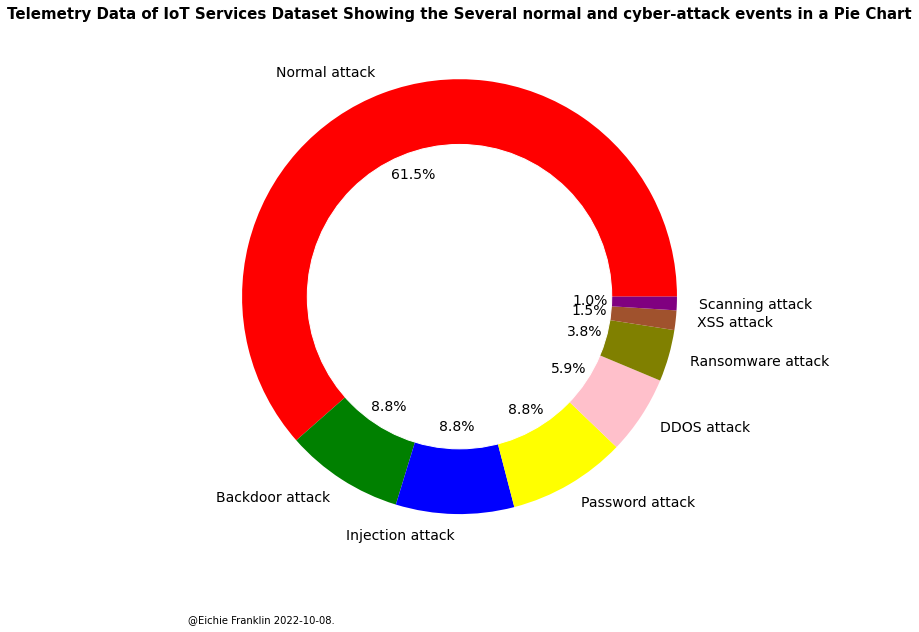

In [135]:
"""
   Exploratory Data Analysis (EDA): - Several normal and cyber-attack events from telemetry data of IoT services.
"""
## Plot the data:

plt.figure(figsize = (20, 10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(IoT_All_Dataset['type'].value_counts(), labels=['Normal attack', 'Backdoor attack', 'Injection attack', 'Password attack', 'DDOS attack',
                                                   'Ransomware attack', 'XSS attack', 'Scanning attack'], 
        colors=['red', 'green', 'blue', 'yellow', 'pink', 'olive', 'sienna', 'purple'], autopct = '%1.1f%%', textprops={'fontsize': 14, })
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Telemetry Data of IoT Services Dataset Showing the Several normal and cyber-attack events in a Pie Chart', size = 15, fontweight='bold')
plt.annotate(f"@Eichie Franklin {today}.", 
             xy=(1, 1),  xycoords='data',
             xytext=(0, -0.10), textcoords='axes fraction',
             color='black')
plt.savefig('Telemetry Data of IoT Services Dataset Showing Several normal and cyber-attack events in a Pie Chart_B.png')
plt.show()

In [136]:
"""
   B. Data Pre-processing - IoT All Dataset:
"""

print(IoT_All_Dataset.info())

"""
   i. Make X & Y Variables from the Data:
"""
y_ = IoT_All_Dataset['label']
x_ = IoT_All_Dataset.iloc[:, :-2]

# count the frequency of each class
count = Counter(y_)
print(count)

"""
   ii. Data Splitting - 80% train set and 20% test set:
""" 
X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.20, random_state=42)

"""
iii.Data Augmentation 

   Since our data in biased, we need to use data aUgmentation on it so that we can remove bias from data and make equal distributions.
   The class imbalance problem occurs when there is no balanced distribution among classes. The intuition to solve such a problem is 
   to add more data to the minority class to generate a balance among the classes however, in real machine learning systems, it is 
   difficult to obtain more data due to the nature of the problem. Due to this, various alternatives have been proposed to address 
   the problem of class imbalance in tabular data such as over-sampling, under-sampling and the generation of synthetic data. One of
   such alternative is the use of the Synthetic Minority Over-sampling Technique (SMOTE) Algorithm as described by Chawla et al. (2002).

   Therefore, we will apply the Synthetic Minority Over-sampling Technique (SMOTE) Algorithm to achieve this.
   SMOTE is an over-sampling technique focused on generating synthetic tabular data. The general idea of SMOTE is the generation of 
   synthetic data between each sample of the minority class and its “k” nearest neighbors. That is, for each one of the samples of the 
   minority class, its “k” nearest neighbors are located (by default k = 5), then between the pairs of points generated by the sample 
   and each of its neighbors, a new synthetic data is generated.

   However, there are still some challenges with the SMOTE method such as it only works with continuous data
   (that is, it is not designed to generate categorical synthetic data), on the other hand, the synthetic data generated is linearly dependent, 
   which can cause a bias in the data generated and consequently produce an overfitted model. 
   Hence several variations of the SMOTE method has been proposed. These include:

   1. Borderline-SMOTE by Han et al (2005)
   2. Adaptive Synthetic (ADASYN) by He et al (2008)

   Borderline-SMOTE focuses on generating synthetic data by considering only samples that make up the border that divides one class from another.
   ADASYN focuses on those samples of the minority class that are difficult to classify because they are in a low-density area.

   However, in this study, we focus on the use of the SMOTE by Chawla et al. (2002).
   Here, we used the defaults parameters of the Algorithm.
"""

# create artificial data with SMOTE
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

# count number of records in each class
count = Counter(y_train_smote)
print(count)

"""
    Normalize the data:
"""
normalize = MinMaxScaler()
X_train_smote = normalize.fit_transform(X_train_smote)
X_test = normalize.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341532 entries, 0 to 341531
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ﻿ts                        341532 non-null  object
 1   temperature                341532 non-null  object
 2   pressure                   341532 non-null  object
 3   humidity                   341532 non-null  object
 4   thermostat_status          341532 non-null  object
 5   latitude                   341532 non-null  object
 6   longitude                  341532 non-null  object
 7   FC1_Read_Input_Register    341532 non-null  object
 8   FC2_Read_Discrete_Value    341532 non-null  object
 9   FC3_Read_Holding_Register  341532 non-null  object
 10  FC4_Read_Coil              341532 non-null  object
 11  motion_status              341532 non-null  object
 12  fridge_temperature         341532 non-null  object
 13  label                      341532 non-null  

In [137]:
"""
   Build The Model:
"""

print(X_train_smote.shape)
print(X_test.shape)
print(y_train_smote.shape)
print(y_test.shape)

(336282, 13)
(68307, 13)
(336282,)
(68307,)


In [138]:
"""
   Compile and Build the Machine Learning Random Forest and Support Vector Machine Models for Comparison:
"""

# Define Some Metrics:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Time Taken: 14.001 seconds
Accuracy on test data is: 1.0000
Time Taken: 0.380 seconds
Accuracy: 1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41859
           1       1.00      1.00      1.00     26448

    accuracy                           1.00     68307
   macro avg       1.00      1.00      1.00     68307
weighted avg       1.00      1.00      1.00     68307


 confussion matrix:
 [[41859     0]
 [    0 26448]]
Normalized confusion matrix


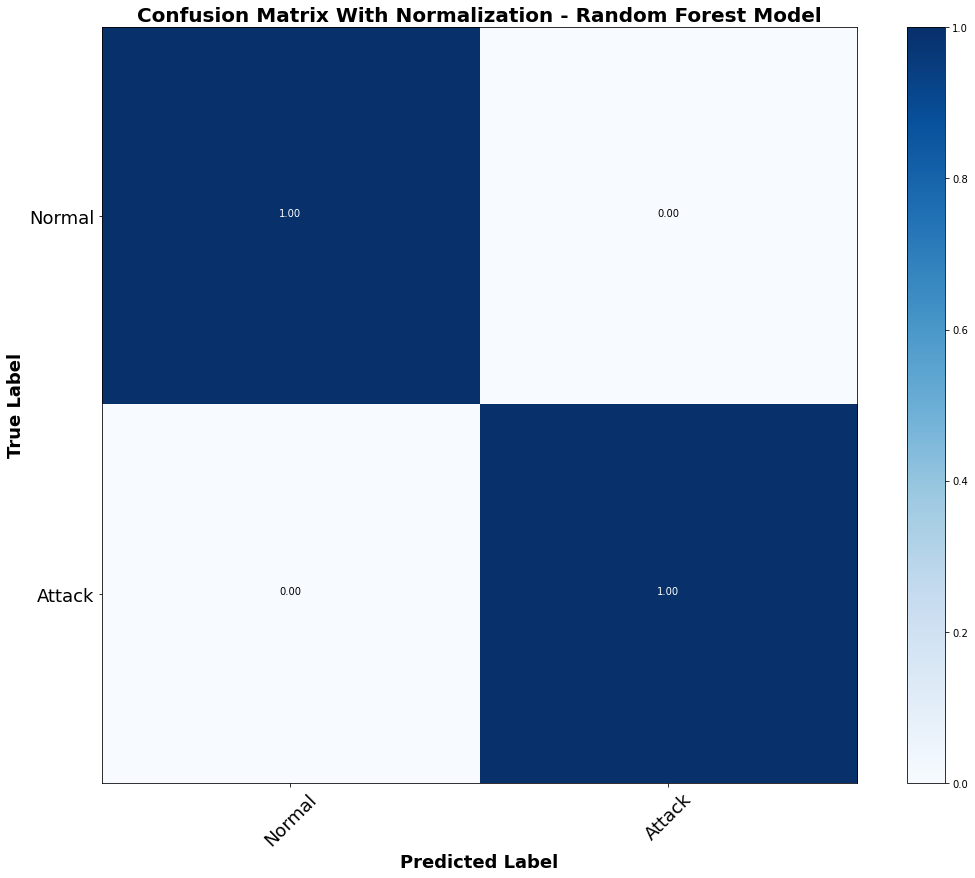

In [139]:
"""
   Model 1 - Random Forest (RF) Classifier:
   Here, we use Random Forest Classifier to fit to our training dataset & predict results.
"""
# instantiate the classifier and fit to training data
start = time.time()

rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

# viewing params of random forest
rf.get_params()

all_models = list()
performance_all = {}

# Evaluate the model
print('Accuracy on test data is: %.4f' % rf.score(X_test, y_test))

# making predictions on test set
start = time.time()

y_pred_rf = rf.predict(X_test)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('F1 score:', f1_score(y_test, y_pred_rf, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_rf, average='weighted'))
print('Precision:', precision_score(y_test, y_pred_rf, average='weighted'))
print('\n clasification report:\n', classification_report(y_test, y_pred_rf))
print('\n confussion matrix:\n', confusion_matrix(y_test, y_pred_rf))

performance_all['RF_Model'] = accuracy_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf, average='weighted'), recall_score(y_test, y_pred_rf, average='weighted'), precision_score(y_test, y_pred_rf, average='weighted')

model1 = rf
all_models.append(model1)

# Plot Model's Confusion Matrix:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 20, fontweight='bold')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=18)
    plt.yticks(tick_marks, classes, fontsize=18)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label', weight='bold').set_fontsize('18')
    plt.xlabel('Predicted Label', weight='bold').set_fontsize('18')
    plt.savefig('Confusion Matrix for Random Forest Model.png')

cf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(15, 12))
plot_confusion_matrix(cf_matrix, classes=['Normal', 'Attack'], 
                      normalize = True, title='Confusion Matrix With Normalization - Random Forest Model')
plt.show()

Accuracy on test data is: 1.0000
Time Taken: 0.226 seconds
Accuracy: 1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41859
           1       1.00      1.00      1.00     26448

    accuracy                           1.00     68307
   macro avg       1.00      1.00      1.00     68307
weighted avg       1.00      1.00      1.00     68307


 confussion matrix:
 [[41859     0]
 [    0 26448]]
Normalized confusion matrix


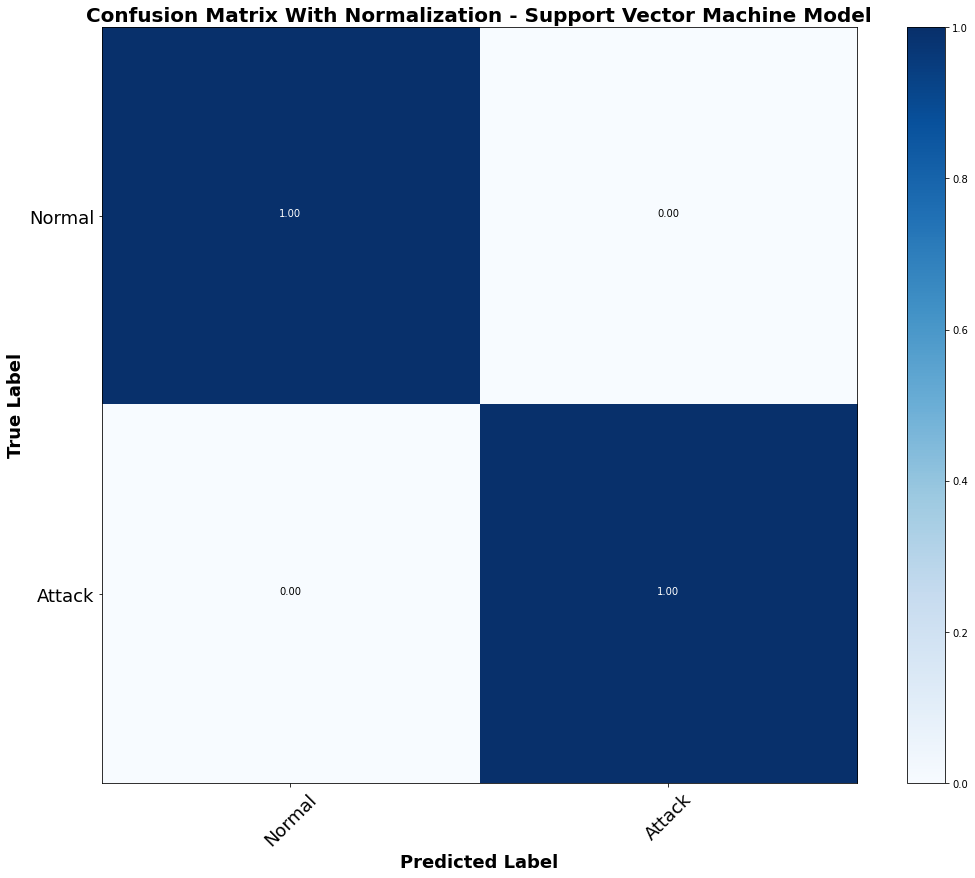

In [140]:
"""
   Model 2 - Support Vector Machine (SVM):
   Similar to RF Model, we'll fit SVM on our training dataset and check its performance on test data.
"""
# instantiate and fit SVM to train data

svc = SVC()
clf = OneVsRestClassifier(estimator=svc)
clf.fit(X_train_smote, y_train_smote)

# check parameters of SVM
clf.get_params()

# Evaluate the model
print('Accuracy on test data is: %.4f' % clf.score(X_test, y_test))

# making predictions on test set
start = time.time()

y_pred_svc = clf.predict(X_test)

end = time.time()
print('Time Taken: %.3f seconds' % (end-start))

print('Accuracy:', accuracy_score(y_test, y_pred_svc))
print('F1 score:', f1_score(y_test, y_pred_svc, average='weighted'))
print('Recall:', recall_score(y_test, y_pred_svc, average='weighted'))
print('Precision:', precision_score(y_test, y_pred_svc, average='weighted'))
print('\n clasification report:\n', classification_report(y_test, y_pred_svc))
print('\n confussion matrix:\n', confusion_matrix(y_test, y_pred_svc))

performance_all['SVC_Model'] = accuracy_score(y_test, y_pred_svc), f1_score(y_test, y_pred_svc, average='weighted'), recall_score(y_test, y_pred_svc, average='weighted'), precision_score(y_test, y_pred_svc, average='weighted')

model2 = clf
all_models.append(model2)

# Plot Model's Confusion Matrix:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 20, fontweight='bold')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=18)
    plt.yticks(tick_marks, classes, fontsize=18)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label', weight='bold').set_fontsize('18')
    plt.xlabel('Predicted Label', weight='bold').set_fontsize('18')
    plt.savefig('Confusion Matrix for Support Vector Machine Model.png')

cf_matrix = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(15, 12))
plot_confusion_matrix(cf_matrix, classes=['Normal', 'Attack'], 
                      normalize = True, title='Confusion Matrix With Normalization - Support Vector Machine Model')
plt.show()

In [ ]:
"""
   Next:

   1. Perform the Random Search Hyperparameter Optimization - Due 22/10/2022
   2. Build The Deep Learning Model - CNN, Hybrid CNN - BiLSTM, and the Attention based Hybrid CNN - BiLSTM - Due 22/10/2022
   3. Performance Evaluation based on all Metrics for both ML and DL Models - Due 22/10/2022
   4. Chapter 3 Write Up - Methodology - Due 5/11/2022
   5. Chapter 4 Write Up - Results and Discussion - Due 19/11/2022
   6. Chapter 5 Write Up - Conclusion and Recommendation - Due 30/11/2022
"""